In [1]:
from os import path
import sys
sys.path.append(path.abspath('..'))
from route_dynamics.route_elevation import base as rbs
from route_dynamics.route_energy import longi_dynam_model as ldm
from route_dynamics.tests import test_longi_dynam_model as tldm
from route_dynamics.tests import simple_route as sro

import numpy as np
import pandas as pd

In [2]:
test_instance__0_grade = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=None,
        elevation_gradient_const=0,
        )

In [3]:
test_instance__0_grade.route_df

,coordinates,gradient,geometry,distance_from_last_point,cum_distance,is_bus_stop,velocity,delta_time,acceleration,passenger_mass,grav_force,roll_fric,aero_drag,inertia,power_output
0,"(1, 0)",0.0,None,NaN,0.0,False,0.0000,NaN,NaN,0.0,-0.0,-1268.1387,-0.000000,NaN,NaN
1,"(2, 0)",0.0,"LINESTRING (1 0, 2 0)",1.0,1.0,False,6.7056,3.3528,2.0,0.0,-0.0,-1268.1387,-11.981465,25854.0,181950.556182
2,"(3, 0)",0.0,"LINESTRING (2 0, 3 0)",1.0,2.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
3,"(4, 0)",0.0,"LINESTRING (3 0, 4 0)",1.0,3.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
4,"(5, 0)",0.0,"LINESTRING (4 0, 5 0)",1.0,4.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
5,"(6, 0)",0.0,"LINESTRING (5 0, 6 0)",1.0,5.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
6,"(7, 0)",0.0,"LINESTRING (6 0, 7 0)",1.0,6.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
7,"(8, 0)",0.0,"LINESTRING (7 0, 8 0)",1.0,7.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
8,"(9, 0)",0.0,"LINESTRING (8 0, 9 0)",1.0,8.0,False,0.0000,3.3528,-2.0,0.0,-0.0,-1268.1387,-0.000000,-25854.0,-0.000000


In [4]:
test_instance__1_grade = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=None,
        elevation_gradient_const=1,
        )

In [5]:
test_instance__1_grade.route_df

,coordinates,gradient,geometry,distance_from_last_point,cum_distance,is_bus_stop,velocity,delta_time,acceleration,passenger_mass,grav_force,roll_fric,aero_drag,inertia,power_output
0,"(1, 0)",1.0,None,NaN,0.0,False,0.0000,NaN,NaN,0.0,-89670.947426,-896.709474,-0.000000,NaN,NaN
1,"(2, 0)",1.0,"LINESTRING (1 0, 2 0)",1.0,1.0,False,6.7056,3.3528,2.0,0.0,-89670.947426,-896.709474,-11.981465,25854.0,780757.405422
2,"(3, 0)",1.0,"LINESTRING (2 0, 3 0)",1.0,2.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
3,"(4, 0)",1.0,"LINESTRING (3 0, 4 0)",1.0,3.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
4,"(5, 0)",1.0,"LINESTRING (4 0, 5 0)",1.0,4.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
5,"(6, 0)",1.0,"LINESTRING (5 0, 6 0)",1.0,5.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
6,"(7, 0)",1.0,"LINESTRING (6 0, 7 0)",1.0,6.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
7,"(8, 0)",1.0,"LINESTRING (7 0, 8 0)",1.0,7.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
8,"(9, 0)",1.0,"LINESTRING (8 0, 9 0)",1.0,8.0,False,0.0000,3.3528,-2.0,0.0,-89670.947426,-896.709474,-0.000000,-25854.0,0.000000


In [6]:
test_instance__stop = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=[(6.43,0.54)],
        elevation_gradient_const=0.,
        )

In [7]:
test_instance__stop.route_df.iloc[5].is_bus_stop

True

In [8]:
import numpy as np
len(np.append(np.nan, np.ones(9)))

10

## Testing realistic velocity model

In [9]:
real_instance_1 = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='const_accel_between_stops_and_speed_lim',
        stop_coords=None,
        elevation_gradient_const=1,
        )

real_instance_1.route_df

In [36]:
space = range(1,100)
coords = list(zip(space,[0]*len(space)))
# coords

In [37]:
real_instance_2 = sro.SimpleRouteTrajectory(
        coords,
        bus_speed_model='const_accel_between_stops_and_speed_lim',
        stop_coords=[(60,0), (65,0)],
        elevation_gradient_const=1,
        )

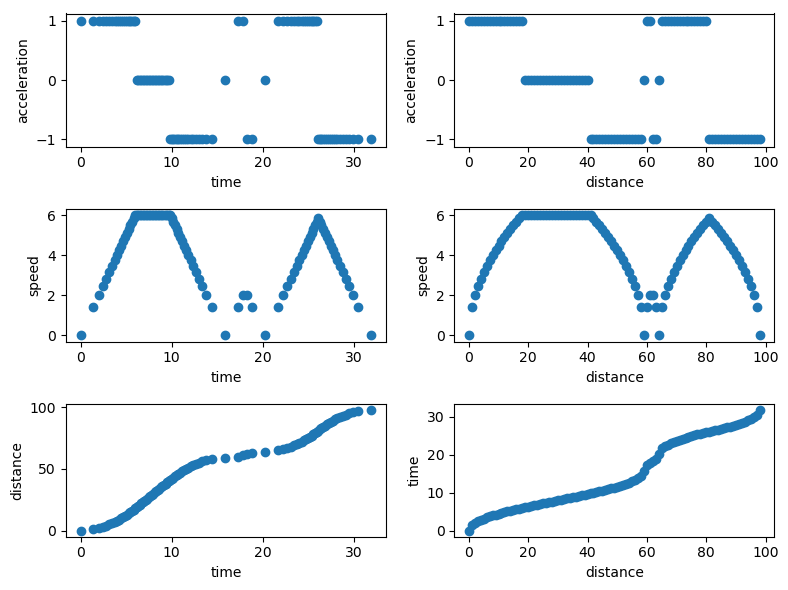

In [41]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,dpi=100, figsize=(8,6))
x = real_instance_2.route_df.cum_distance.values
v = real_instance_2.route_df.velocity.values
a = real_instance_2.route_df.acceleration.values
t = real_instance_2.route_time

axes[0,0].scatter(t,a)
axes[0,0].set_xlabel('time')
axes[0,0].set_ylabel('acceleration')


axes[1,0].scatter(t,v)
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('speed')

axes[2,0].scatter(t,x)
axes[2,0].set_xlabel('time')
axes[2,0].set_ylabel('distance')


axes[0,1].scatter(x,a)
axes[0,1].set_xlabel('distance')
axes[0,1].set_ylabel('acceleration')

axes[1,1].scatter(x,v)
axes[1,1].set_xlabel('distance')
axes[1,1].set_ylabel('speed')

axes[2,1].scatter(x,t)
axes[2,1].set_ylabel('time')
axes[2,1].set_xlabel('distance')

fig.tight_layout()

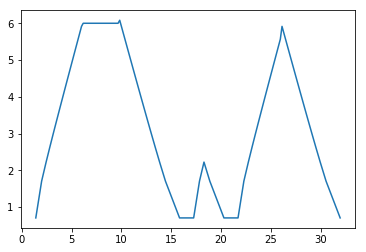

In [18]:
plt.plot(t[1:],np.diff(x)/np.diff(t))

## Writing testes for bus mass array integration

In [93]:
testar = np.ones(10)
testar[:]=np.nan
testar[-2]=5

testar[0]=2
testar[3]=6
testar


array([ 2., nan, nan,  6., nan, nan, nan, nan,  5., nan])

In [94]:
for i in range(len(testar)-1):
    j = 1
#     print(np.isnan(testar[i+j]))
    try:
        while np.isnan(testar[i+j]):
            testar[i+j]=testar[i]
            print(testar[i+j] )
            j+=1
    except: IndexError

2.0
2.0
6.0
6.0
6.0
6.0
5.0


In [101]:
if not None: print(0)

0
